In [10]:
import sys
sys.path.append("../src")  # Allow importing from src folder

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from log_parser import parse_nasa_log

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['font.family'] = 'DejaVu Sans'
warnings.filterwarnings("ignore", message="Glyph.*missing from font.*")

In [3]:
file_path = "/Users/shreyassonwane/Desktop/Desktop_New/LLM Projects/llm-log-summarizer/data/NASA_access_log_Jul95"

df = parse_nasa_log(file_path)
print(f"Rows parsed: {len(df)}")
df.head()


Rows parsed: 1891714


,host,timestamp,request,status,size
0,199.72.81.55,01/Jul/1995:00:00:01 -0400,GET /history/apollo/ HTTP/1.0,200,6245
1,unicomp6.unicomp.net,01/Jul/1995:00:00:06 -0400,GET /shuttle/countdown/ HTTP/1.0,200,3985
2,199.120.110.21,01/Jul/1995:00:00:09 -0400,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,4085
3,burger.letters.com,01/Jul/1995:00:00:11 -0400,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,0
4,199.120.110.21,01/Jul/1995:00:00:11 -0400,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,4179


In [4]:
# Parse timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d/%b/%Y:%H:%M:%S %z", errors='coerce')

# Drop rows with invalid timestamps
df = df.dropna(subset=['timestamp'])

# Extract HTTP method from 'request' column
df['method'] = df['request'].str.split().str[0]

# Extract hour from timestamp for hourly analysis
df['hour'] = df['timestamp'].dt.hour

print("Columns:", df.columns)
print(df[['timestamp', 'method', 'hour']].head())


Columns: Index(['host', 'timestamp', 'request', 'status', 'size', 'method', 'hour'], dtype='object')
                  timestamp method  hour
0 1995-07-01 00:00:01-04:00    GET     0
1 1995-07-01 00:00:06-04:00    GET     0
2 1995-07-01 00:00:09-04:00    GET     0
3 1995-07-01 00:00:11-04:00    GET     0
4 1995-07-01 00:00:11-04:00    GET     0


In [5]:
print("Total requests:", len(df))
print("Unique HTTP methods:", df['method'].unique())
print("Status codes count:")
print(df['status'].value_counts())
print("Size stats:")
print(df['size'].describe())

Total requests: 1891714
Unique HTTP methods: ['GET' 'HEAD' 'POST' '\x05\x01' '1/history/apollo/images/'
 'k\x83û\x03tx\x83û\x04tG\x83û\x07tÍ\x83û']
Status codes count:
status
200    1701534
304     132627
302      46573
404      10845
500         62
403         54
501         14
400          5
Name: count, dtype: int64
Size stats:
count    1.891714e+06
mean     2.045551e+04
std      7.695742e+04
min      0.000000e+00
25%      7.860000e+02
50%      3.635000e+03
75%      1.185300e+04
max      6.823936e+06
Name: size, dtype: float64


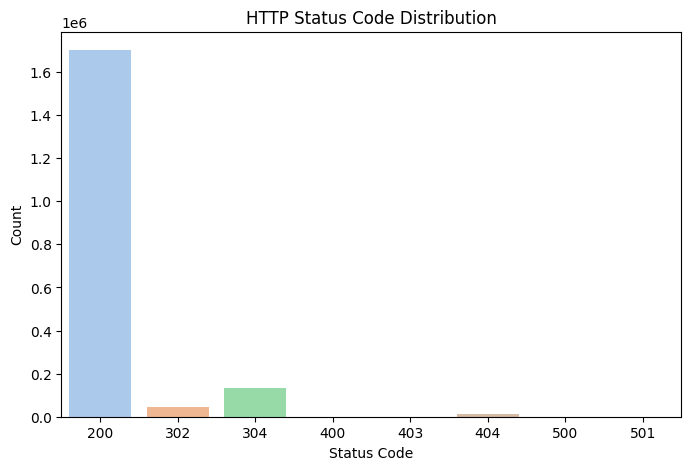

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='status', data=df, palette='pastel')
plt.title('HTTP Status Code Distribution')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.show()

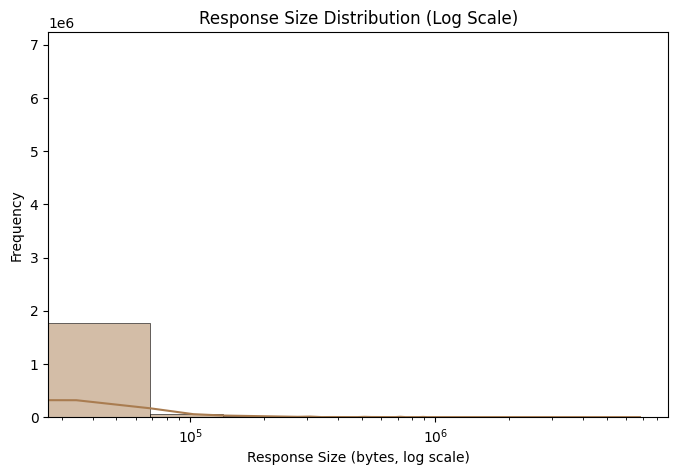

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['size'], bins=100, kde=True, color="#a97c50")  # pastel brown
plt.xscale('log')
plt.title('Response Size Distribution (Log Scale)')
plt.xlabel('Response Size (bytes, log scale)')
plt.ylabel('Frequency')
plt.show()

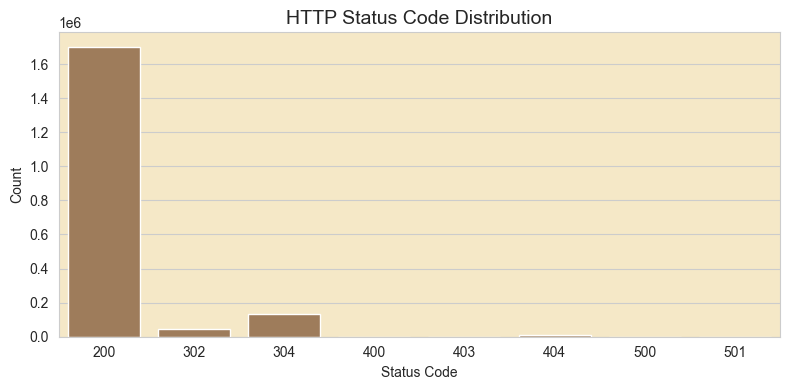

In [18]:
PASTEL_BEIGE = "#f5e8c7"
PASTEL_BROWN = "#a97c50"

# Calculate counts of each HTTP status code in df
status_counts = df['status'].value_counts().sort_index()

# Plot HTTP status code distribution
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid", {"axes.facecolor": PASTEL_BEIGE})

sns.barplot(
    x=status_counts.index.astype(str),
    y=status_counts.values,
    palette=[PASTEL_BROWN] * len(status_counts)
)

plt.title('HTTP Status Code Distribution', fontsize=14)
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

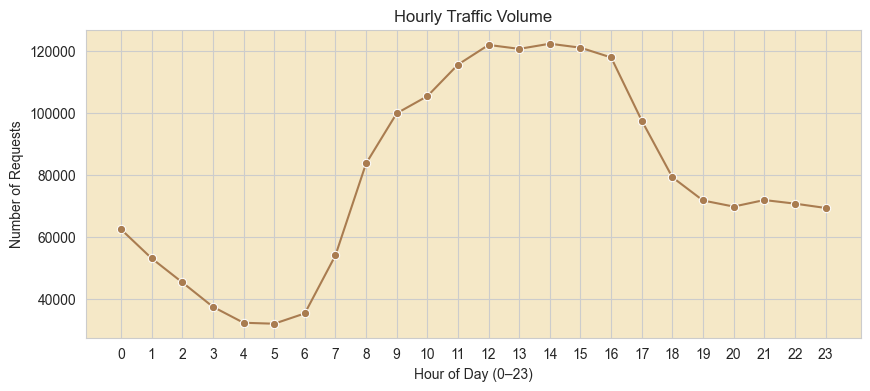

In [19]:
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color="#a97c50")
plt.title('Hourly Traffic Volume')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Requests')
plt.xticks(range(24))
plt.show()